<a href="https://colab.research.google.com/github/kimdesok/FinanceDataReader/blob/master/MarketIndexTrends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install finance-dataReader==0.5.0

In [9]:
import FinanceDataReader as fdr
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

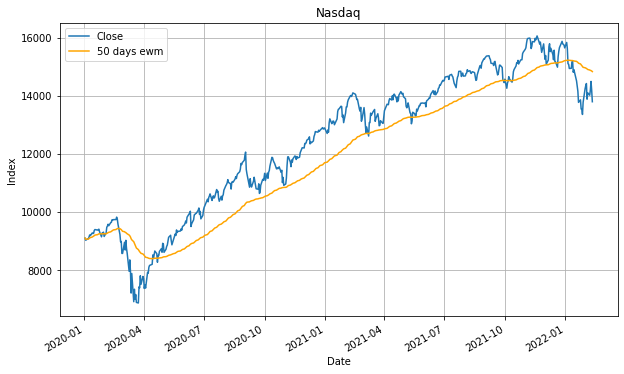

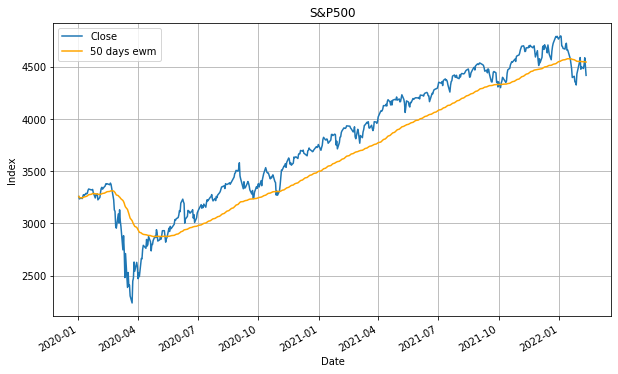

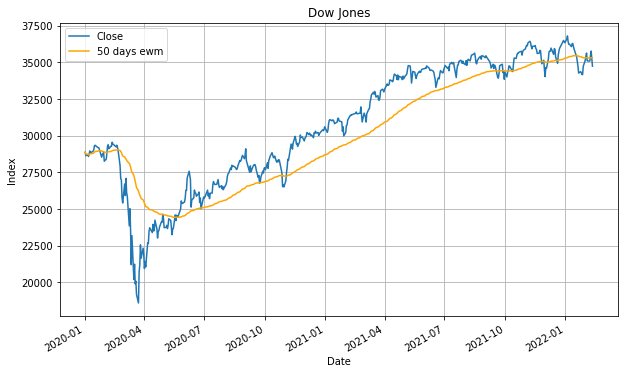

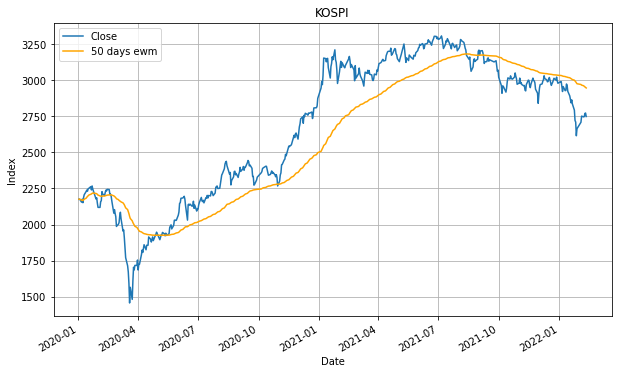

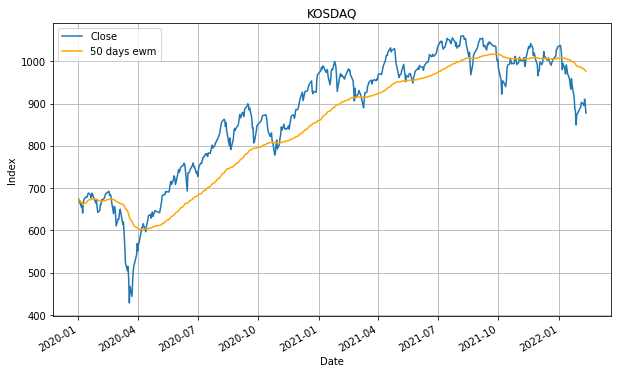

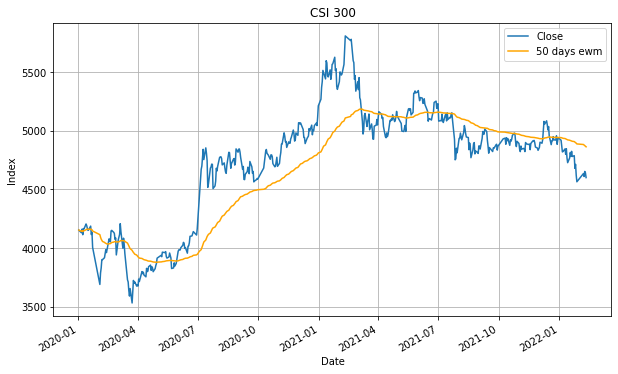

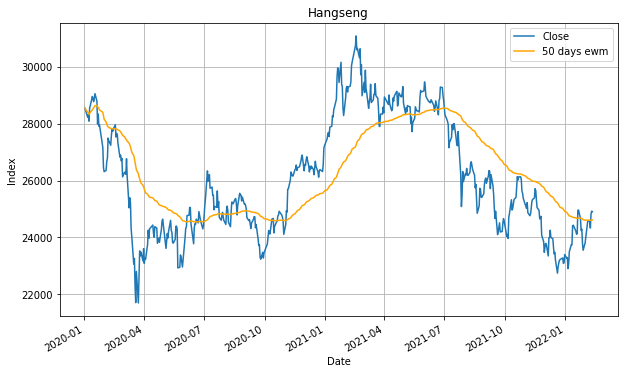

In [3]:
import matplotlib.pyplot as plt
from datetime import date

market_list = {'Nasdaq':'IXIC','S&P500':'US500', 'Dow Jones':'DJI', 'KOSPI':'KS11', 'KOSDAQ':'KQ11', 'CSI 300': 'CSI300', 'Hangseng':'HSI'	}

for name, code in market_list.items() :
  df = fdr.DataReader(code, start='2020', data_source='fred')
  #df.info()

  plt.figure(figsize=(10, 6))
  h0 = df['Close'].plot()
  Roll_Exponentional_Mean = df['Close'].ewm(50, min_periods=1).mean()
  h1 = Roll_Exponentional_Mean.plot(color='orange', label='50 days ewm')
  plt.ylabel('Index')
  plt.title(name)
  plt.legend()
  plt.grid(True)
  plt.show()


Displaying from 2021-08-01  to  2022-02-11


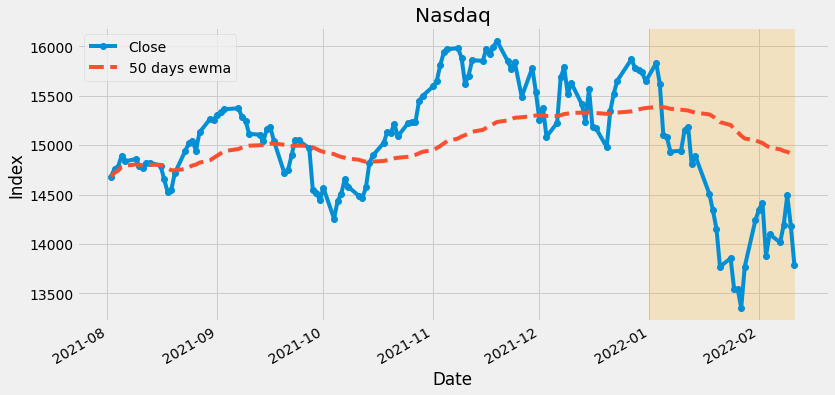

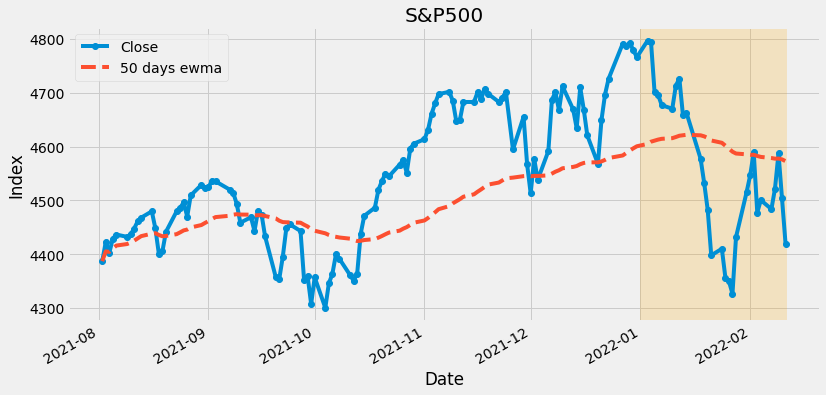

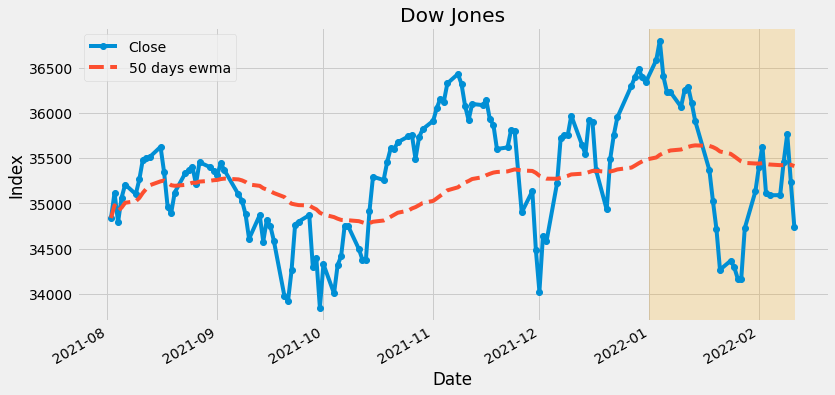

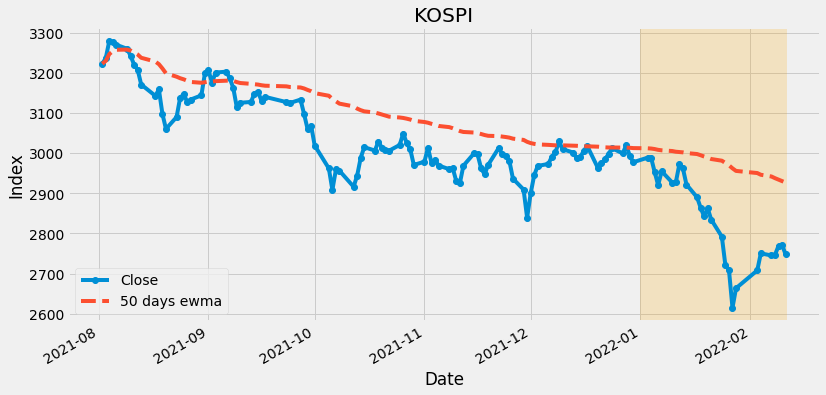

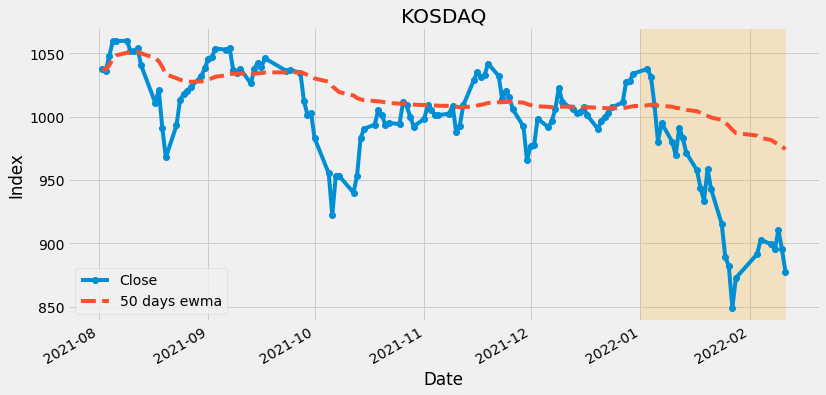

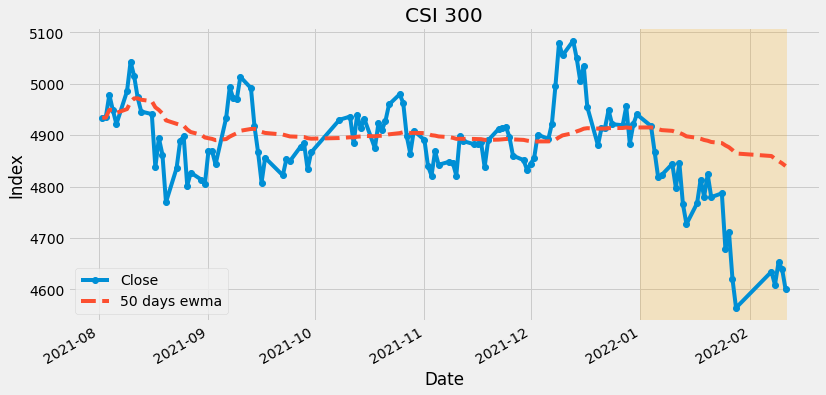

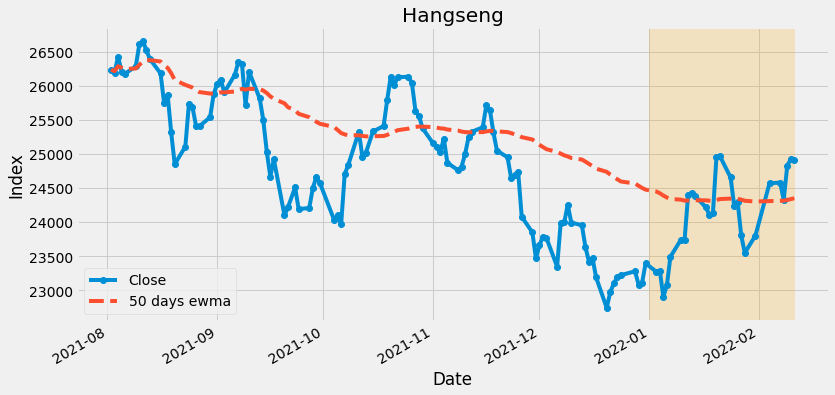

In [6]:
with plt.style.context('fivethirtyeight'):
  plt.rcParams["axes.grid"] = True
  plt.rcParams["figure.figsize"] = (12,6)
  plt.rcParams['axes.unicode_minus'] = False
  plt.rcParams["axes.formatter.limits"] = -10000, 10000

  start_date='2021-08-01'
  highlight_date='2022-01-01'
  end_date=date.today()
  print("Displaying from", start_date, " to ", end_date)

  for name, code in market_list.items() :
    df = fdr.DataReader(code, start=start_date, data_source='fred')
    df['ewm'] = df['Close'].ewm(50, min_periods=1).mean()
    #plt.figure(figsize=(10, 6))
    df = df[['Close','ewm']]
    ax = df['Close'].plot(marker='o')
    ax = ax.axvspan(highlight_date, end_date, color='orange', alpha=0.2)
    ax1 = df['ewm'].plot(linestyle='--', label='50 days ewma')
    
    plt.ylabel('Index')
    plt.title(name)
    plt.legend()
    plt.grid(True)
    plt.show()